In [1]:
%matplotlib inline
import netCDF4 
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd

Location: Golfo de Penas (chilean Patagonia).

Geo-cordinates (image subset):
- NLb = -44.531
- WLb = -75.854
- SLb = -47.584
- ELb = -74.462

**DATE: 2022/01/19**

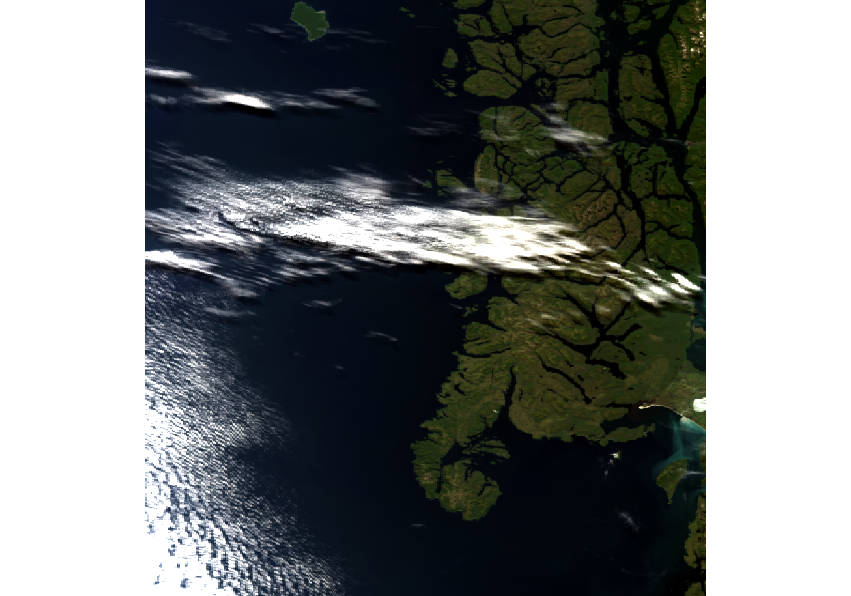

In [2]:
# Xarray dataset from SNAP (Sentinel Application Plataform) C2RCC Processor
file = 'subset2_20220119T133947_C2RCC.nc'
ds = xr.open_dataset(file)
print('data size:',ds.nbytes/1e6, 'MB')
ds

data size: 141.642 MB


<xarray.Dataset>
Dimensions:                                            (y: 915, x: 860)
Coordinates:
    lat                                                (y, x) float64 ...
    lon                                                (y, x) float64 ...
Dimensions without coordinates: y, x
Data variables: (12/41)
    conc_tsm                                           (y, x) float32 ...
    conc_chl                                           (y, x) float32 ...
    unc_tsm                                            (y, x) float32 ...
    unc_chl                                            (y, x) float32 ...
    TP_latitude                                        (y, x) float32 ...
    TP_longitude                                       (y, x) float32 ...
    ...                                                 ...
    horizontal_wind_vector_1                           (y, x) float32 ...
    horizontal_wind_vector_2                           (y, x) float32 ...
    humidity                                           (y, x) float32 ...
    sea_level_pressure                                 (y, x) float32 ...
    total_columnar_water_vapour                        (y, x) float32 ...
    total_ozone                                        (y, x) float32 ...
Attributes:
    Conventions:  CF-1.4
    TileSize:     305:430
    start_date:   19-JAN-2022 13:40:38.714632
    stop_date:    19-JAN-2022 13:41:18.939571

In [3]:
# Checking all variables
nc = netCDF4.Dataset(file, mode='r')
nc.variables.keys()

dict_keys(['conc_tsm', 'conc_chl', 'unc_tsm', 'unc_chl', 'TP_latitude', 'TP_longitude', 'OAA', 'OZA', 'SAA', 'SZA', 'atmospheric_temperature_profile_pressure_level_1', 'atmospheric_temperature_profile_pressure_level_2', 'atmospheric_temperature_profile_pressure_level_3', 'atmospheric_temperature_profile_pressure_level_4', 'atmospheric_temperature_profile_pressure_level_5', 'atmospheric_temperature_profile_pressure_level_6', 'atmospheric_temperature_profile_pressure_level_7', 'atmospheric_temperature_profile_pressure_level_8', 'atmospheric_temperature_profile_pressure_level_9', 'atmospheric_temperature_profile_pressure_level_10', 'atmospheric_temperature_profile_pressure_level_11', 'atmospheric_temperature_profile_pressure_level_12', 'atmospheric_temperature_profile_pressure_level_13', 'atmospheric_temperature_profile_pressure_level_14', 'atmospheric_temperature_profile_pressure_level_15', 'atmospheric_temperature_profile_pressure_level_16', 'atmospheric_temperature_profile_pressure_lev

In [4]:
# Variables of interest
con_chl = nc.variables['conc_chl']
con_tsm = nc.variables['conc_tsm']

In [5]:
chl = np.array(con_chl)
tsm = np.array(con_tsm)

In [6]:
# DataFrame with chl and tsm values 
df = pd.DataFrame(data={'chl' : chl.flatten(), 'tsm' : tsm.flatten()})

In [7]:
df.describe()

,chl,tsm
count,786900.000000,786900.000000
mean,7.599428,10.232532
std,14.391048,30.254333
min,0.000000,0.000000
25%,0.000000,0.000000
50%,2.165780,0.966399
75%,3.405814,1.794521
max,84.568169,280.376129


In [9]:
# uncertainty or error of chl and tsm values
u_chl = nc.variables['unc_chl']
u_tsm = nc.variables['unc_tsm']

In [10]:
chl_unc = np.array(u_chl)
tsm_unc = np.array(u_tsm)

In [11]:
# Dataframe
df_u = pd.DataFrame(data={'chl_unc' : chl_unc.flatten(), 'tsm_unc' : tsm_unc.flatten()})

In [12]:
df_u.describe()

,chl_unc,tsm_unc
count,786900.000000,786900.000000
mean,0.697835,1.300094
std,1.275959,4.283366
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.201810,0.103248
75%,0.351990,0.241878
max,34.793198,85.668846


### Chlorophyll a

(array([[439.,   9.,  14., ...,   8.,   3.,   0.],
        [421.,  15.,  18., ...,  13.,   5.,   0.],
        [413.,  14.,  18., ...,  13.,   5.,   0.],
        ...,
        [906.,   7.,   2., ...,   0.,   0.,   0.],
        [909.,   4.,   1., ...,   1.,   0.,   0.],
        [908.,   5.,   1., ...,   1.,   0.,   0.]]),
 array([ 0.      ,  8.456817, 16.913633, 25.370451, 33.827267, 42.284084,
        50.740902, 59.19772 , 67.65453 , 76.11135 , 84.56817 ],
       dtype=float32),
 <a list of 860 BarContainer objects>)

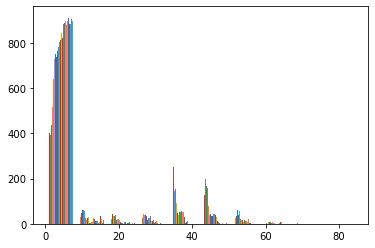

In [14]:
# quick view of values distribution
plt.hist(chl)

In [15]:
# chl concentration under 5 ug m-3
chl_values = df.chl[df["chl"]<=5.00]

In [16]:
chl_values.describe()

count    641285.000000
mean          1.544702
std           1.343904
min           0.000000
25%           0.000000
50%           1.675690
75%           2.710979
max           4.998534
Name: chl, dtype: float64

In [17]:
# chl concentration over 5 ug m-3
chl_high_values = df.chl[df["chl"]>=5.00]

In [18]:
chl_high_values.describe()

count    145615.000000
mean         34.264637
std          15.503509
min           5.000741
25%          21.125010
50%          39.599987
75%          45.165470
max          84.568169
Name: chl, dtype: float64

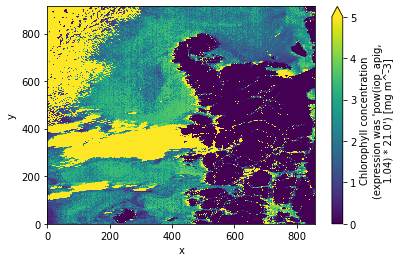

In [19]:
# Chlorophyll a map with matplotlib
ds.conc_chl.plot(vmin = 0, vmax = 5)

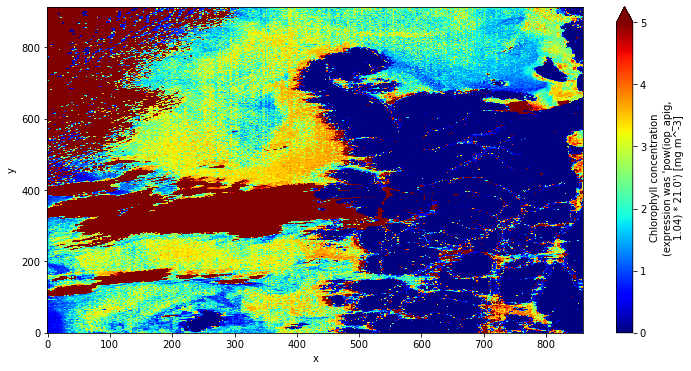

In [20]:
# another map
fig,ax=plt.subplots(figsize=(12,6))
ds.conc_chl.plot(vmin=0, vmax=5, cmap='jet',ax=ax)

#### SNAP chlorophyll a concentration with cloud risk mask

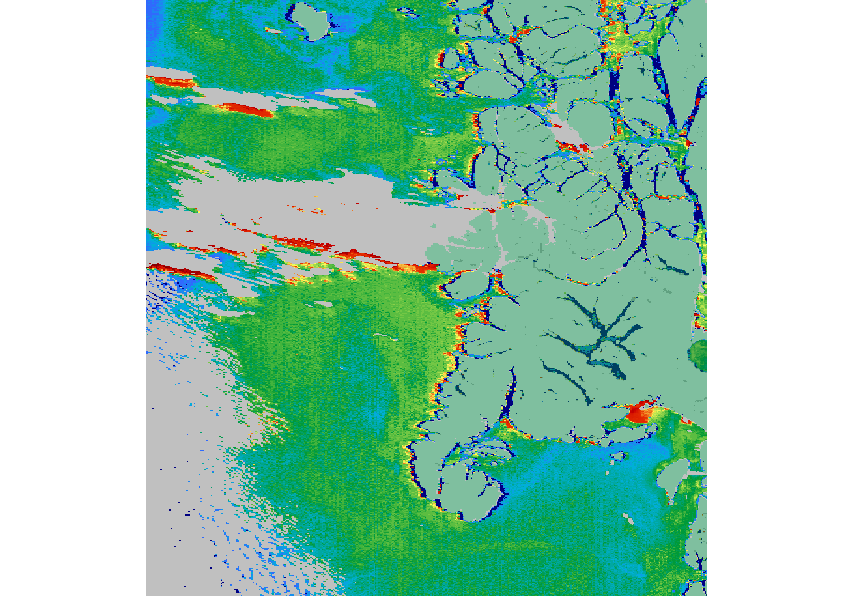

C:\Users\smart\Anaconda3\envs\mlpycaret\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


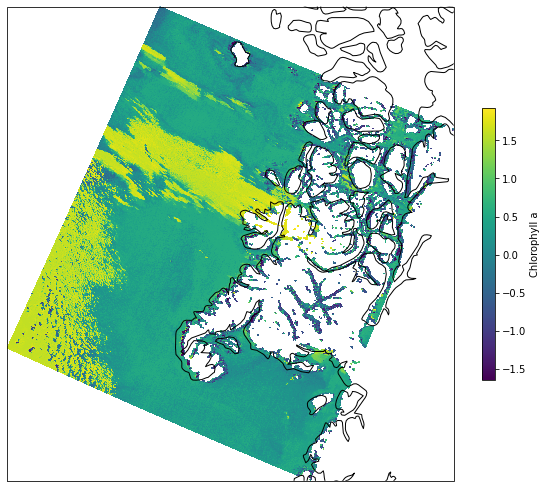

In [21]:
#Log10 scale of chlorophyll a map

import rasterio
import cartopy.crs as ccrs
proj = ccrs.Mercator()
data_crs = ccrs.PlateCarree()

plt.figure( figsize=(10,10))
ax = plt.axes(projection=proj)


# defining the variables to plot
## log transformation
conc_chl = np.log10(ds.conc_chl)
lat = ds.lat
lon = ds.lon

plt.pcolor(lon, lat, conc_chl, transform = data_crs)

plt.colorbar(label = 'Chlorophyll a', shrink=0.5)

ax.coastlines('10m')

plt.show()

### TSM (Total Suspended Matter)

(array([[521., 109.,  73., ...,   0.,   0.,   0.],
        [516., 114.,  68., ...,   0.,   0.,   0.],
        [499., 129.,  84., ...,   0.,   0.,   0.],
        ...,
        [901.,   0.,   1., ...,   2.,   5.,   2.],
        [905.,   0.,   0., ...,   1.,   3.,   1.],
        [907.,   0.,   0., ...,   1.,   3.,   1.]]),
 array([  0.      ,  28.037613,  56.075226,  84.11284 , 112.15045 ,
        140.18806 , 168.22568 , 196.26329 , 224.3009  , 252.33852 ,
        280.37613 ], dtype=float32),
 <a list of 860 BarContainer objects>)

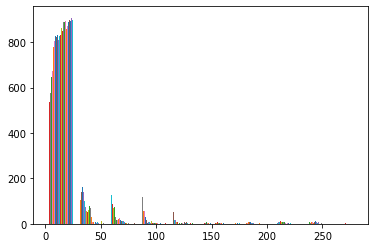

In [23]:
# quick view of values distribution
plt.hist(tsm)

In [24]:
# tsm concentration under 20 mg m-3
tsm_values = df.tsm[df["tsm"]<=20.00]

In [25]:
tsm_values.describe()

count    687981.000000
mean          1.259202
std           2.472231
min           0.000000
25%           0.000000
50%           0.769183
75%           1.410527
max          19.999338
Name: tsm, dtype: float64

In [26]:
# tsm concentration over 20 mg m-3
tsm_high_values = df.tsm[df["tsm"]>=20.00]

In [27]:
tsm_high_values.describe()

count    98919.000000
mean        72.650177
std         52.935776
min         20.000490
25%         35.984318
50%         53.483658
75%         91.828724
max        280.376129
Name: tsm, dtype: float64

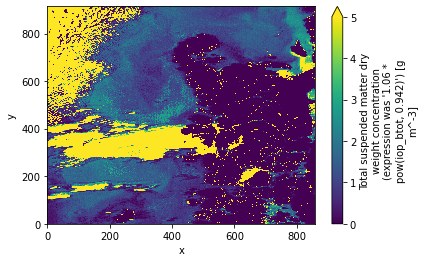

In [30]:
# TSM map with matplotlib
ds.conc_tsm.plot(vmin = 0, vmax = 5)

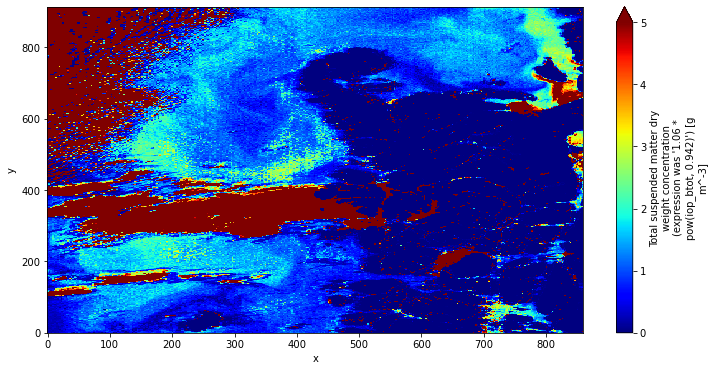

In [31]:
fig,ax=plt.subplots(figsize=(12,6))
ds.conc_tsm.plot(vmin=0, vmax=5, cmap='jet',ax=ax)

#### SNAP picture TSM concentration

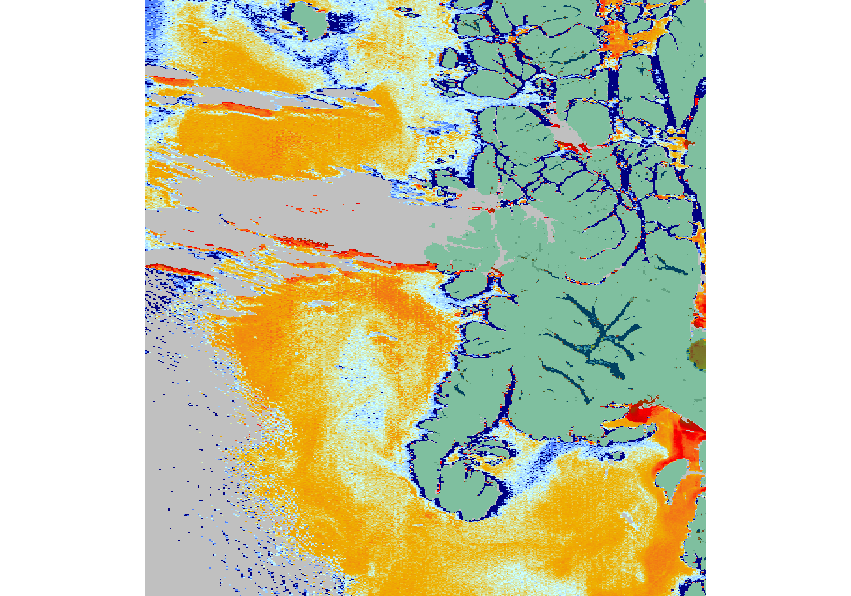